In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 150)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [1, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 0], [0, 1, 0, 1], [0, 0, 0, 0], [1, 0, 0, 0], [1, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:648
number of class2:969

 ****** Running generation 0 ****** 

Population's average fitness: 0.51482 stdev: 0.08941
Best fitness: 0.70439 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.191
Mean genetic distance 2.894, standard deviation 0.472
Population of 198 members in 19 species
Total extinctions: 0
Generation time: 5.680 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55996 stdev: 0.08316
Best fitness: 0.73408 - size: (2, 14) - species 9 - id 228
Average adjusted fitness: 0.182
Mean genetic distance 2.927, standard deviation 0.492
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 6.056 sec (5.868 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57883 stdev: 0.08148
Best fitness: 0.73717 - size: (4, 16) - species 7 - id 518
Average adjusted fitness: 0.195
Mean genetic distance 2.917, standard deviation 0.497
Population of 199 members in 24 species
Total extinctio

Population's average fitness: 0.62149 stdev: 0.09499
Best fitness: 0.76252 - size: (5, 19) - species 4 - id 3023
Average adjusted fitness: 0.279
Mean genetic distance 3.244, standard deviation 0.523
Population of 194 members in 26 species
Total extinctions: 0
Generation time: 8.264 sec (7.931 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.62598 stdev: 0.09228
Best fitness: 0.76252 - size: (5, 19) - species 4 - id 3023
Average adjusted fitness: 0.266
Mean genetic distance 3.248, standard deviation 0.527
Population of 195 members in 26 species
Total extinctions: 0
Generation time: 8.332 sec (8.015 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63252 stdev: 0.09091
Best fitness: 0.76252 - size: (5, 19) - species 4 - id 3023
Average adjusted fitness: 0.241
Mean genetic distance 3.279, standard deviation 0.514
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 7.602 sec (8.073 average)

 ****** Ru

Population's average fitness: 0.63878 stdev: 0.09612
Best fitness: 0.78108 - size: (7, 25) - species 8 - id 5820
Average adjusted fitness: 0.271
Mean genetic distance 3.221, standard deviation 0.571
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 10.460 sec (9.903 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.63472 stdev: 0.10223
Best fitness: 0.78108 - size: (7, 25) - species 8 - id 5820
Average adjusted fitness: 0.316
Mean genetic distance 3.236, standard deviation 0.549
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 10.351 sec (10.076 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.62149 stdev: 0.10604
Best fitness: 0.78108 - size: (7, 25) - species 8 - id 5820
Average adjusted fitness: 0.256
Mean genetic distance 3.254, standard deviation 0.546
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 10.449 sec (10.233 average)

 ****

Population's average fitness: 0.64240 stdev: 0.10887
Best fitness: 0.79716 - size: (12, 33) - species 41 - id 9504
Average adjusted fitness: 0.255
Mean genetic distance 3.174, standard deviation 0.553
Population of 204 members in 18 species
Total extinctions: 0
Generation time: 10.905 sec (10.651 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.63731 stdev: 0.11027
Best fitness: 0.79716 - size: (9, 28) - species 56 - id 10539
Average adjusted fitness: 0.345
Mean genetic distance 3.189, standard deviation 0.545
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 10.755 sec (10.683 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.65291 stdev: 0.11022
Best fitness: 0.79716 - size: (9, 28) - species 56 - id 10539
Average adjusted fitness: 0.266
Mean genetic distance 3.203, standard deviation 0.566
Population of 204 members in 19 species
Total extinctions: 0
Generation time: 10.651 sec (10.661 average)

Population's average fitness: 0.64300 stdev: 0.11200
Best fitness: 0.79716 - size: (9, 28) - species 56 - id 10539
Average adjusted fitness: 0.253
Mean genetic distance 3.170, standard deviation 0.630
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 14.068 sec (12.552 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65070 stdev: 0.11469
Best fitness: 0.79716 - size: (9, 28) - species 56 - id 10539
Average adjusted fitness: 0.312
Mean genetic distance 3.148, standard deviation 0.616
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 15.042 sec (12.999 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.63402 stdev: 0.11601
Best fitness: 0.79716 - size: (9, 28) - species 56 - id 10539
Average adjusted fitness: 0.265
Mean genetic distance 3.151, standard deviation 0.607
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 12.283 sec (12.987 average)

Population's average fitness: 0.60239 stdev: 0.12253
Best fitness: 0.80705 - size: (12, 34) - species 64 - id 19231
Average adjusted fitness: 0.231
Mean genetic distance 3.159, standard deviation 0.590
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 11.540 sec (11.613 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.61086 stdev: 0.12214
Best fitness: 0.80705 - size: (12, 34) - species 64 - id 19231
Average adjusted fitness: 0.234
Mean genetic distance 3.156, standard deviation 0.562
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 11.917 sec (11.673 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.63383 stdev: 0.11873
Best fitness: 0.80705 - size: (12, 34) - species 64 - id 19231
Average adjusted fitness: 0.297
Mean genetic distance 3.145, standard deviation 0.577
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 12.511 sec (11.755 ave

Population's average fitness: 0.65649 stdev: 0.10406
Best fitness: 0.81571 - size: (21, 53) - species 73 - id 21296
Average adjusted fitness: 0.291
Mean genetic distance 3.154, standard deviation 0.571
Population of 204 members in 17 species
Total extinctions: 0
Generation time: 12.203 sec (12.260 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.63798 stdev: 0.11909
Best fitness: 0.81571 - size: (21, 53) - species 73 - id 21296
Average adjusted fitness: 0.339
Mean genetic distance 3.152, standard deviation 0.553
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 12.135 sec (12.221 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.65141 stdev: 0.10785
Best fitness: 0.81571 - size: (21, 53) - species 73 - id 21296
Average adjusted fitness: 0.372
Mean genetic distance 3.125, standard deviation 0.559
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 12.335 sec (12.234 ave

Population's average fitness: 0.64182 stdev: 0.09877
Best fitness: 0.80767 - size: (3, 15) - species 27 - id 383
Average adjusted fitness: 0.290
Mean genetic distance 3.143, standard deviation 0.515
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.726 sec (6.808 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64113 stdev: 0.09322
Best fitness: 0.80767 - size: (3, 15) - species 27 - id 383
Average adjusted fitness: 0.246
Mean genetic distance 3.150, standard deviation 0.517
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.783 sec (6.832 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.63268 stdev: 0.10068
Best fitness: 0.81014 - size: (3, 15) - species 27 - id 2804
Average adjusted fitness: 0.284
Mean genetic distance 3.178, standard deviation 0.523
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 6.821 sec (6.781 average)

 ****** R

Mean genetic distance 3.129, standard deviation 0.556
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 8.224 sec (9.105 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.65898 stdev: 0.10929
Best fitness: 0.82375 - size: (8, 23) - species 26 - id 6269
Average adjusted fitness: 0.257
Mean genetic distance 3.167, standard deviation 0.563
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 11.796 sec (9.432 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.66061 stdev: 0.10794
Best fitness: 0.82375 - size: (8, 23) - species 26 - id 6269
Average adjusted fitness: 0.312
Mean genetic distance 3.163, standard deviation 0.563
Population of 200 members in 18 species
Total extinctions: 0
Generation time: 8.378 sec (9.343 average)

 ****** Running generation 45 ****** 

Population's average fitness: 0.66019 stdev: 0.11111
Best fitness: 0.82375 - size: (8, 23) - species 26 - id 6269

Mean genetic distance 3.120, standard deviation 0.585
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 8.542 sec (8.743 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.67369 stdev: 0.10089
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.335
Mean genetic distance 3.141, standard deviation 0.602
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 8.365 sec (8.777 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.65938 stdev: 0.12042
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.268
Mean genetic distance 3.173, standard deviation 0.602
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 8.373 sec (8.754 average)

 ****** Running generation 69 ****** 

Population's average fitness: 0.68084 stdev: 0.10226
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932


Mean genetic distance 3.082, standard deviation 0.619
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 13.457 sec (10.954 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.64883 stdev: 0.10941
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.389
Mean genetic distance 3.076, standard deviation 0.630
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 9.568 sec (11.012 average)

 ****** Running generation 92 ****** 

Population's average fitness: 0.64772 stdev: 0.11259
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.309
Mean genetic distance 3.073, standard deviation 0.638
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 10.622 sec (11.159 average)

 ****** Running generation 93 ****** 

Population's average fitness: 0.64407 stdev: 0.11255
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 

Mean genetic distance 3.076, standard deviation 0.591
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 10.224 sec (10.198 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.67288 stdev: 0.10670
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.351
Mean genetic distance 3.072, standard deviation 0.604
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 10.786 sec (10.259 average)

 ****** Running generation 116 ****** 

Population's average fitness: 0.66517 stdev: 0.11213
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.322
Mean genetic distance 3.059, standard deviation 0.611
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 10.715 sec (10.312 average)

 ****** Running generation 117 ****** 

Population's average fitness: 0.67496 stdev: 0.11381
Best fitness: 0.84663 - size: (9, 29) - species 26 -

Mean genetic distance 3.075, standard deviation 0.561
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 9.669 sec (10.776 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.66955 stdev: 0.10994
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.267
Mean genetic distance 3.055, standard deviation 0.575
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 9.510 sec (10.542 average)

 ****** Running generation 140 ****** 

Population's average fitness: 0.66019 stdev: 0.10577
Best fitness: 0.84663 - size: (9, 29) - species 26 - id 8932
Average adjusted fitness: 0.297
Mean genetic distance 3.046, standard deviation 0.583
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 9.219 sec (10.247 average)

 ****** Running generation 141 ****** 

Population's average fitness: 0.67221 stdev: 0.09839
Best fitness: 0.84663 - size: (9, 29) - species 26 - id

Mean genetic distance 3.129, standard deviation 0.474
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 7.211 sec (6.719 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61921 stdev: 0.09426
Best fitness: 0.77737 - size: (2, 15) - species 34 - id 971
Average adjusted fitness: 0.298
Mean genetic distance 3.144, standard deviation 0.485
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.075 sec (6.806 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62717 stdev: 0.08259
Best fitness: 0.77737 - size: (2, 15) - species 34 - id 971
Average adjusted fitness: 0.268
Mean genetic distance 3.137, standard deviation 0.474
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.184 sec (6.894 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62568 stdev: 0.08812
Best fitness: 0.77737 - size: (2, 15) - species 34 - id 971
Ave

Mean genetic distance 3.208, standard deviation 0.520
Population of 195 members in 27 species
Total extinctions: 0
Generation time: 8.515 sec (8.881 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.64446 stdev: 0.09059
Best fitness: 0.81262 - size: (9, 25) - species 17 - id 4888
Average adjusted fitness: 0.249
Mean genetic distance 3.179, standard deviation 0.527
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.395 sec (8.750 average)

 ****** Running generation 38 ****** 

Population's average fitness: 0.64689 stdev: 0.09126
Best fitness: 0.81262 - size: (9, 25) - species 17 - id 4888
Average adjusted fitness: 0.277
Mean genetic distance 3.189, standard deviation 0.522
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.952 sec (8.909 average)

 ****** Running generation 39 ****** 

Population's average fitness: 0.64833 stdev: 0.08440
Best fitness: 0.81262 - size: (9, 25) - species 17 - id 4888


Mean genetic distance 3.124, standard deviation 0.621
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 13.175 sec (10.959 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.64735 stdev: 0.09315
Best fitness: 0.81942 - size: (10, 29) - species 17 - id 7654
Average adjusted fitness: 0.249
Mean genetic distance 3.143, standard deviation 0.607
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 9.792 sec (10.932 average)

 ****** Running generation 62 ****** 

Population's average fitness: 0.63573 stdev: 0.09725
Best fitness: 0.81942 - size: (10, 29) - species 17 - id 7654
Average adjusted fitness: 0.234
Mean genetic distance 3.156, standard deviation 0.601
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 9.762 sec (10.872 average)

 ****** Running generation 63 ****** 

Population's average fitness: 0.63687 stdev: 0.10597
Best fitness: 0.81942 - size: (10, 29) - species 17 - i

Mean genetic distance 3.250, standard deviation 0.663
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 10.569 sec (10.213 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.65245 stdev: 0.09342
Best fitness: 0.82313 - size: (13, 41) - species 51 - id 9511
Average adjusted fitness: 0.247
Mean genetic distance 3.233, standard deviation 0.670
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 10.824 sec (10.310 average)

 ****** Running generation 86 ****** 

Population's average fitness: 0.64341 stdev: 0.10551
Best fitness: 0.82313 - size: (13, 41) - species 51 - id 9511
Average adjusted fitness: 0.253
Mean genetic distance 3.257, standard deviation 0.634
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 10.350 sec (10.348 average)

 ****** Running generation 87 ****** 

Population's average fitness: 0.63906 stdev: 0.10348
Best fitness: 0.82313 - size: (13, 41) - species 51 -

Population's average fitness: 0.66079 stdev: 0.11024
Best fitness: 0.84106 - size: (13, 38) - species 7 - id 15980
Average adjusted fitness: 0.275
Mean genetic distance 3.115, standard deviation 0.537
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 11.430 sec (11.208 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.67063 stdev: 0.10192
Best fitness: 0.84106 - size: (13, 38) - species 7 - id 15980
Average adjusted fitness: 0.281
Mean genetic distance 3.155, standard deviation 0.538
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 11.236 sec (11.243 average)

 ****** Running generation 110 ****** 

Population's average fitness: 0.68283 stdev: 0.09944
Best fitness: 0.84106 - size: (13, 38) - species 7 - id 15980
Average adjusted fitness: 0.282
Mean genetic distance 3.165, standard deviation 0.537
Population of 194 members in 17 species
Total extinctions: 0
Generation time: 11.664 sec (11.312 averag

Population's average fitness: 0.67311 stdev: 0.09620
Best fitness: 0.84106 - size: (13, 38) - species 7 - id 15980
Average adjusted fitness: 0.307
Mean genetic distance 3.168, standard deviation 0.600
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 12.059 sec (12.133 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.66515 stdev: 0.10743
Best fitness: 0.84106 - size: (13, 38) - species 7 - id 15980
Average adjusted fitness: 0.285
Mean genetic distance 3.161, standard deviation 0.594
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 11.911 sec (12.121 average)

 ****** Running generation 134 ****** 

Population's average fitness: 0.65692 stdev: 0.10406
Best fitness: 0.84106 - size: (13, 38) - species 7 - id 15980
Average adjusted fitness: 0.318
Mean genetic distance 3.171, standard deviation 0.593
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 12.039 sec (12.117 averag

Total extinctions: 0
Generation time: 6.497 sec (6.610 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57707 stdev: 0.09222
Best fitness: 0.77427 - size: (3, 17) - species 1 - id 1000
Average adjusted fitness: 0.270
Mean genetic distance 3.143, standard deviation 0.517
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.248 sec (6.844 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58121 stdev: 0.08961
Best fitness: 0.77427 - size: (3, 17) - species 1 - id 1000
Average adjusted fitness: 0.235
Mean genetic distance 3.114, standard deviation 0.533
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 9.949 sec (7.232 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59149 stdev: 0.08548
Best fitness: 0.80272 - size: (4, 18) - species 23 - id 1423
Average adjusted fitness: 0.191
Mean genetic distance 3.135, standard deviation 0.533
Population of

Population's average fitness: 0.63082 stdev: 0.09328
Best fitness: 0.80272 - size: (4, 18) - species 23 - id 1423
Average adjusted fitness: 0.237
Mean genetic distance 3.251, standard deviation 0.524
Population of 196 members in 26 species
Total extinctions: 0
Generation time: 7.824 sec (8.014 average)

 ****** Running generation 31 ****** 

Population's average fitness: 0.62759 stdev: 0.09726
Best fitness: 0.80272 - size: (4, 18) - species 23 - id 1423
Average adjusted fitness: 0.248
Mean genetic distance 3.274, standard deviation 0.525
Population of 196 members in 24 species
Total extinctions: 0
Generation time: 7.515 sec (7.942 average)

 ****** Running generation 32 ****** 

Population's average fitness: 0.62589 stdev: 0.09269
Best fitness: 0.80272 - size: (4, 18) - species 23 - id 1423
Average adjusted fitness: 0.317
Mean genetic distance 3.284, standard deviation 0.522
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 7.674 sec (7.936 average)

 ******

Population's average fitness: 0.64535 stdev: 0.09411
Best fitness: 0.81385 - size: (4, 19) - species 38 - id 6739
Average adjusted fitness: 0.255
Mean genetic distance 3.163, standard deviation 0.550
Population of 194 members in 18 species
Total extinctions: 0
Generation time: 8.351 sec (8.438 average)

 ****** Running generation 55 ****** 

Population's average fitness: 0.64207 stdev: 0.10282
Best fitness: 0.81385 - size: (4, 19) - species 38 - id 6739
Average adjusted fitness: 0.268
Mean genetic distance 3.181, standard deviation 0.573
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 8.329 sec (8.485 average)

 ****** Running generation 56 ****** 

Population's average fitness: 0.63859 stdev: 0.10458
Best fitness: 0.81385 - size: (4, 19) - species 38 - id 6739
Average adjusted fitness: 0.279
Mean genetic distance 3.195, standard deviation 0.583
Population of 195 members in 19 species
Total extinctions: 0
Generation time: 10.303 sec (8.721 average)

 *****

Population's average fitness: 0.64468 stdev: 0.10252
Best fitness: 0.81385 - size: (4, 19) - species 51 - id 6739
Average adjusted fitness: 0.238
Mean genetic distance 3.047, standard deviation 0.578
Population of 201 members in 17 species
Total extinctions: 0
Generation time: 11.043 sec (10.101 average)

 ****** Running generation 79 ****** 

Population's average fitness: 0.63890 stdev: 0.10423
Best fitness: 0.81385 - size: (4, 19) - species 51 - id 6739
Average adjusted fitness: 0.256
Mean genetic distance 3.028, standard deviation 0.570
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 10.240 sec (10.029 average)

 ****** Running generation 80 ****** 

Population's average fitness: 0.62571 stdev: 0.10734
Best fitness: 0.81385 - size: (4, 19) - species 51 - id 6739
Average adjusted fitness: 0.319
Mean genetic distance 3.027, standard deviation 0.575
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 9.285 sec (9.842 average)

 **

Population's average fitness: 0.62093 stdev: 0.11956
Best fitness: 0.82746 - size: (9, 29) - species 52 - id 15470
Average adjusted fitness: 0.306
Mean genetic distance 2.896, standard deviation 0.528
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 11.928 sec (12.573 average)

 ****** Running generation 103 ****** 

Population's average fitness: 0.63243 stdev: 0.10973
Best fitness: 0.82746 - size: (9, 29) - species 52 - id 15470
Average adjusted fitness: 0.289
Mean genetic distance 2.936, standard deviation 0.521
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 11.020 sec (12.439 average)

 ****** Running generation 104 ****** 

Population's average fitness: 0.61121 stdev: 0.11898
Best fitness: 0.82746 - size: (9, 29) - species 52 - id 15470
Average adjusted fitness: 0.200
Mean genetic distance 2.935, standard deviation 0.511
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 10.459 sec (12.063 averag

Population's average fitness: 0.62082 stdev: 0.11291
Best fitness: 0.82746 - size: (9, 29) - species 74 - id 15470
Average adjusted fitness: 0.210
Mean genetic distance 2.953, standard deviation 0.511
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 11.643 sec (11.642 average)

 ****** Running generation 127 ****** 

Population's average fitness: 0.61158 stdev: 0.12553
Best fitness: 0.82746 - size: (9, 29) - species 74 - id 15470
Average adjusted fitness: 0.213
Mean genetic distance 3.000, standard deviation 0.496
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 11.978 sec (11.726 average)

 ****** Running generation 128 ****** 

Population's average fitness: 0.63505 stdev: 0.11103
Best fitness: 0.82746 - size: (9, 29) - species 74 - id 15470
Average adjusted fitness: 0.236
Mean genetic distance 2.999, standard deviation 0.487
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 11.080 sec (11.668 averag

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.5

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[ 7  0  0  3  0  0  2  0  1  0]
 [ 1 14  0  0  1  2  5  2  2  0]
 [ 1  2 11  4  0  0  0  0 10  4]
 [ 1  0  2  2  0  0  0  0  0  0]
 [ 1  0  1  3 10  0  0  4  0  0]
 [ 0  0  0  3  0  9  0  0  0  0]
 [ 0  0  0  1  0  5 11  0  0  0]
 [ 5  0  0  2  6  1  0 12  1  0]
 [ 0  1  3  0  0  0  0  0  0  0]
 [ 0  2  0  0  3  1  0  1  3 14]]


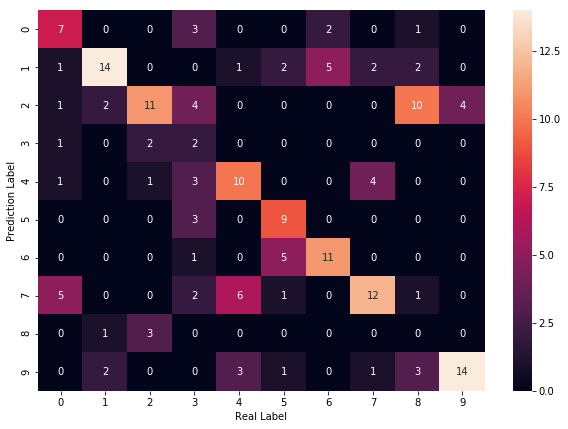

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[1] real:5
#1 min_error:0 index:[2] real:2
#2 min_error:0 index:[0] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[6] real:6
#7 min_error:0 index:[2] real:3
#8 min_error:1 index:[0 2 3 4] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:0 index:[9] real:7
#11 min_error:0 index:[9] real:4
#12 min_error:1 index:[6 8] real:6
#13 min_error:1 index:[0 2 3 4] real:3
#14 min_error:1 index:[0 1 2] real:1
#15 min_error:0 index:[2] real:3
#16 min_error:0 index:[9] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[7] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[1] real:8
#21 min_error:0 index:[4] real:4
#22 min_error:0 index:[2] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[1] real:4
#25 min_error:0 index:[7] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[2] real:3
#28 min_error:1 index:[0 1 2] real:6
#29 min_error:0 index:[2] real:

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.5219542362399505
Avg Base Learner:0.8356524427953


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.07777777777777778
Accuracy on training set: 0.18888888888888888
Accuracy on training set: 0.3
Accuracy on training set: 0.40555555555555556


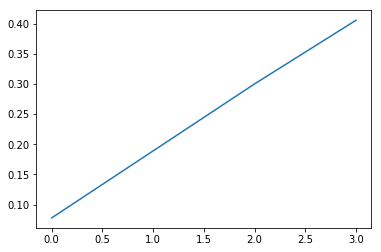

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.07777777777777778, 0.18888888888888888, 0.3, 0.40555555555555556]